<span style="background-color:red;
             color:white;
             font-size:17px;
             text-align:center;
             border-radius:30px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;">1. Importing Libraries
</span>

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 

import warnings
warnings.filterwarnings("ignore")

In [35]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option('precision',3)

<span style="background-color:red;
             color:white;
             font-size:17px;
             text-align:center;
             border-radius:30px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;">2. Importing Power Generation & Weather Sensor Data
</span>

In [36]:
generation_data = pd.read_csv('input/solar-power/Plant_2_Generation_Data.csv')

In [37]:
weather_data = pd.read_csv('input/solar-power/Plant_2_Weather_Sensor_Data.csv')

<span style="background-color:red;
             color:white;
             font-size:17px;
             text-align:center;
             border-radius:30px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;">3. Adjust datetime format
</span>

In [41]:
generation_data['DATE_TIME'] = generation_data['DATE_TIME'].apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d %H:%M'))
weather_data['DATE_TIME'] = weather_data['DATE_TIME'].apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d %H:%M:%S'))

<span style="background-color:red;
             color:white;
             font-size:17px;
             text-align:center;
             border-radius:30px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;">4. Merging generation data and weather sensor data  
</span>

In [42]:
df_solar = pd.merge(generation_data.drop(columns = ['PLANT_ID']), weather_data.drop(columns = ['PLANT_ID', 'SOURCE_KEY']), on='DATE_TIME')
df_solar.sample(5).style.background_gradient(cmap='cool')

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
66435,2020-06-17 09:30:00,WcxssY2VbP4hApt,373.747,366.793,476.600,181908063.600,24.281,25.862,0.221
23512,2020-05-27 16:30:00,4UPUqMRk7TRMgml,507.547,497.580,9056.200,2525382.200,36.576,44.791,0.331
62059,2020-06-15 07:45:00,oZ35aAeoifZaQzV,441.121,432.693,278.643,1660176370.643,26.614,31.780,0.337
20809,2020-05-26 02:45:00,rrq4fwE8jgrTyWY,0.000,0.000,0.000,121022633.000,25.173,24.225,0.000
65506,2020-06-16 23:00:00,NgDl19wMapZy17u,0.000,0.000,5537.000,111741726.000,23.707,22.795,0.000


<span style="background-color:red;
             color:white;
             font-size:17px;
             text-align:center;
             border-radius:30px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;">5. Adding separate time and date columns  
</span>

In [43]:
# adding separate time and date columns
df_solar["DATE"] = pd.to_datetime(df_solar["DATE_TIME"]).dt.date
df_solar["TIME"] = pd.to_datetime(df_solar["DATE_TIME"]).dt.time
df_solar['DAY'] = pd.to_datetime(df_solar['DATE_TIME']).dt.day
df_solar['MONTH'] = pd.to_datetime(df_solar['DATE_TIME']).dt.month
df_solar['WEEK'] = pd.to_datetime(df_solar['DATE_TIME']).dt.week

# Adding hours and minutes for ML models
time_parsed = pd.to_datetime(df_solar['TIME'], format='%H:%M:%S')
df_solar['HOURS'] = time_parsed.dt.hour
df_solar['MINUTES'] = time_parsed.dt.minute
df_solar['TOTAL MINUTES PASS'] = df_solar['MINUTES'] + df_solar['HOURS'] * 60

# Adding date as a string column
df_solar["DATE_STRING"] = df_solar["DATE"].astype(str)
df_solar["HOURS"] = df_solar["HOURS"].astype(str)
df_solar["TIME"] = df_solar["TIME"].astype(str)

df_solar.head(2)


,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE,TIME,DAY,MONTH,WEEK,HOURS,MINUTES,TOTAL MINUTES PASS,DATE_STRING
0,2020-05-15,4UPUqMRk7TRMgml,0.0,0.0,9425.0,2.429e+06,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15
1,2020-05-15,81aHJ1q11NBPMrL,0.0,0.0,0.0,1.215e+09,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15


In [44]:
df_solar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67698 entries, 0 to 67697
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            67698 non-null  datetime64[ns]
 1   SOURCE_KEY           67698 non-null  object        
 2   DC_POWER             67698 non-null  float64       
 3   AC_POWER             67698 non-null  float64       
 4   DAILY_YIELD          67698 non-null  float64       
 5   TOTAL_YIELD          67698 non-null  float64       
 6   AMBIENT_TEMPERATURE  67698 non-null  float64       
 7   MODULE_TEMPERATURE   67698 non-null  float64       
 8   IRRADIATION          67698 non-null  float64       
 9   DATE                 67698 non-null  object        
 10  TIME                 67698 non-null  object        
 11  DAY                  67698 non-null  int64         
 12  MONTH                67698 non-null  int64         
 13  WEEK                 67698 non-

<code style="background:yellow;color:red">There is no Missing Values in the dataset </code>

<span style="background-color:red;
             color:white;
             font-size:17px;
             text-align:center;
             border-radius:30px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;">6. Converting 'SOURCE_KEY' from categorical form to numerical form
</span>

In [47]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df_solar['SOURCE_KEY_NUMBER'] = encoder.fit_transform(df_solar['SOURCE_KEY'])
df_solar.head()


,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE,TIME,DAY,MONTH,WEEK,HOURS,MINUTES,TOTAL MINUTES PASS,DATE_STRING,SOURCE_KEY_NUMBER
0,2020-05-15,4UPUqMRk7TRMgml,0.0,0.0,9425.000,2.429e+06,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,0
1,2020-05-15,81aHJ1q11NBPMrL,0.0,0.0,0.000,1.215e+09,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,1
2,2020-05-15,9kRcWv60rDACzjR,0.0,0.0,3075.333,2.248e+09,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,2
3,2020-05-15,Et9kgGMDl729KT4,0.0,0.0,269.933,1.704e+06,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,3
4,2020-05-15,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000,1.994e+07,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,4


<h1 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:35px; color:#e90045">Data Visualization: </h1>

<span style="background-color:red;
             color:white;
             font-size:17px;
             text-align:center;
             border-radius:30px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;">7. Multiple Plotting of DC_POWER generation on per day basis.
</span>

<span style="background-color:maroon;
             color:white;
             font-size:16px;
             text-align:center;
             border-radius:30px 30px;
             font-weight:bold;
             border:2px solid red;
             padding:5px">Abnormalities in DC_POWER Generation
</span>

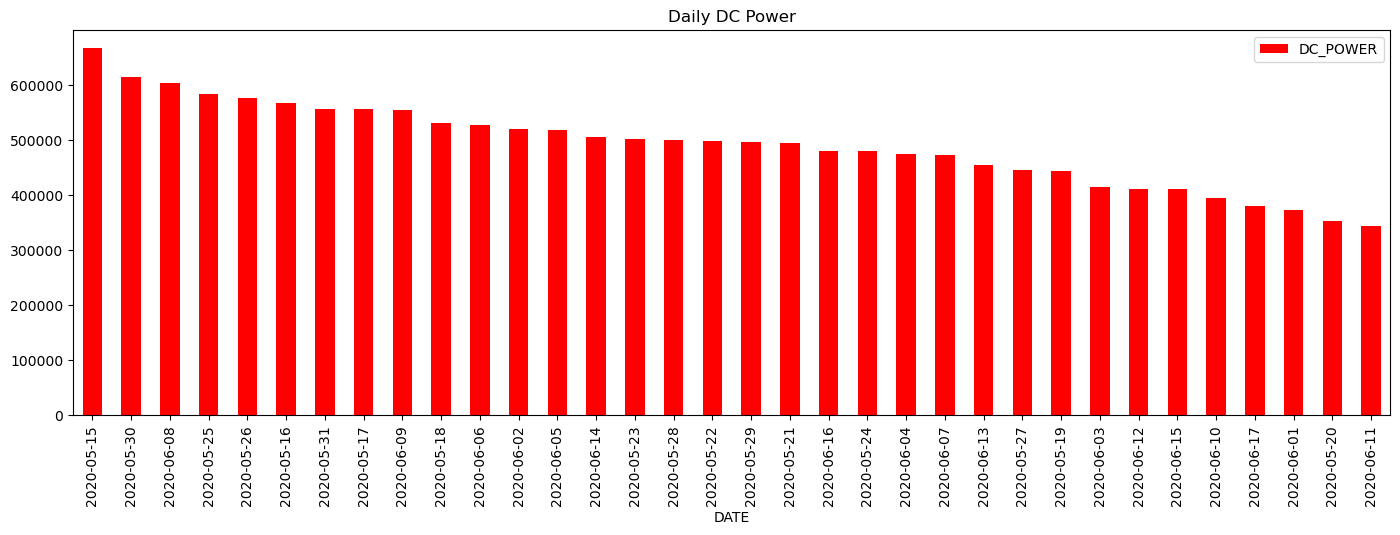

In [48]:
daily_dc = df_solar.groupby('DATE')['DC_POWER'].sum()

ax = daily_dc.sort_values(ascending=False).plot.bar(figsize=(17, 5), legend=True, color='red')
plt.title('Daily DC Power')
plt.show()

<div style="color:white;
       display:fill;
       border-radius:5px;
       background-color:#AC0000;
       font-size:110%;
       font-family:Nexa;
       letter-spacing:0.5px">
    <p style="padding: 10px;
          color:white;">
        NOTE: This Large variation in the DC_POWER generation is due to the fault in the system or due to weather change, which needs to study further. But from this bar plot we find the day on which there is highest DC_POWER is generated and the day with the lowest DC_POWER generated.
    </p>
</div>

<span style="background-color:red;
             color:white;
             font-size:17px;
             text-align:center;
             border-radius:30px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;">8. Multiple Plotting of IRRADIATION generation on per day basis.
</span>

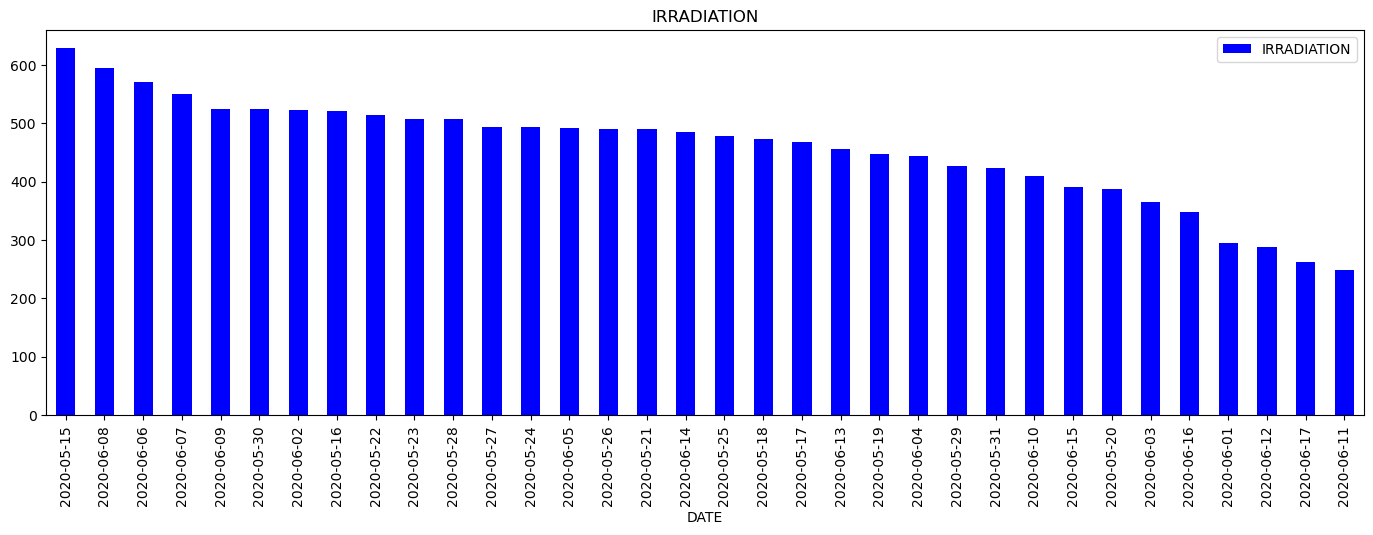

In [49]:
daily_irradiation = df_solar.groupby('DATE')['IRRADIATION'].sum()

daily_irradiation.sort_values(ascending=False).plot.bar(figsize=(17, 5), legend=True, color='blue')
plt.title('IRRADIATION')
plt.show()


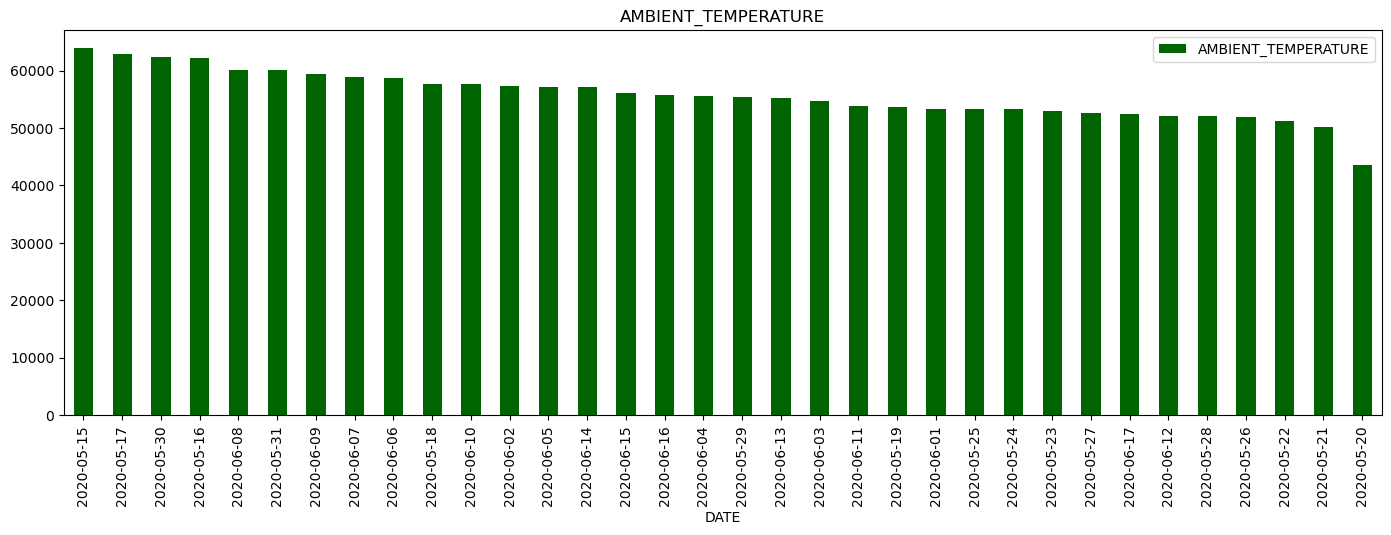

In [50]:
daily_ambient_temp = df_solar.groupby('DATE')['AMBIENT_TEMPERATURE'].sum()

daily_ambient_temp.sort_values(ascending=False).plot.bar(figsize=(17, 5), legend=True, color='darkgreen')
plt.title('AMBIENT_TEMPERATURE')
plt.show()

<span style="background-color:red;
             color:white;
             font-size:17px;
             text-align:center;
             border-radius:30px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;">9. Highest average DC_POWER is generated on "2020-05-15"  
</span>

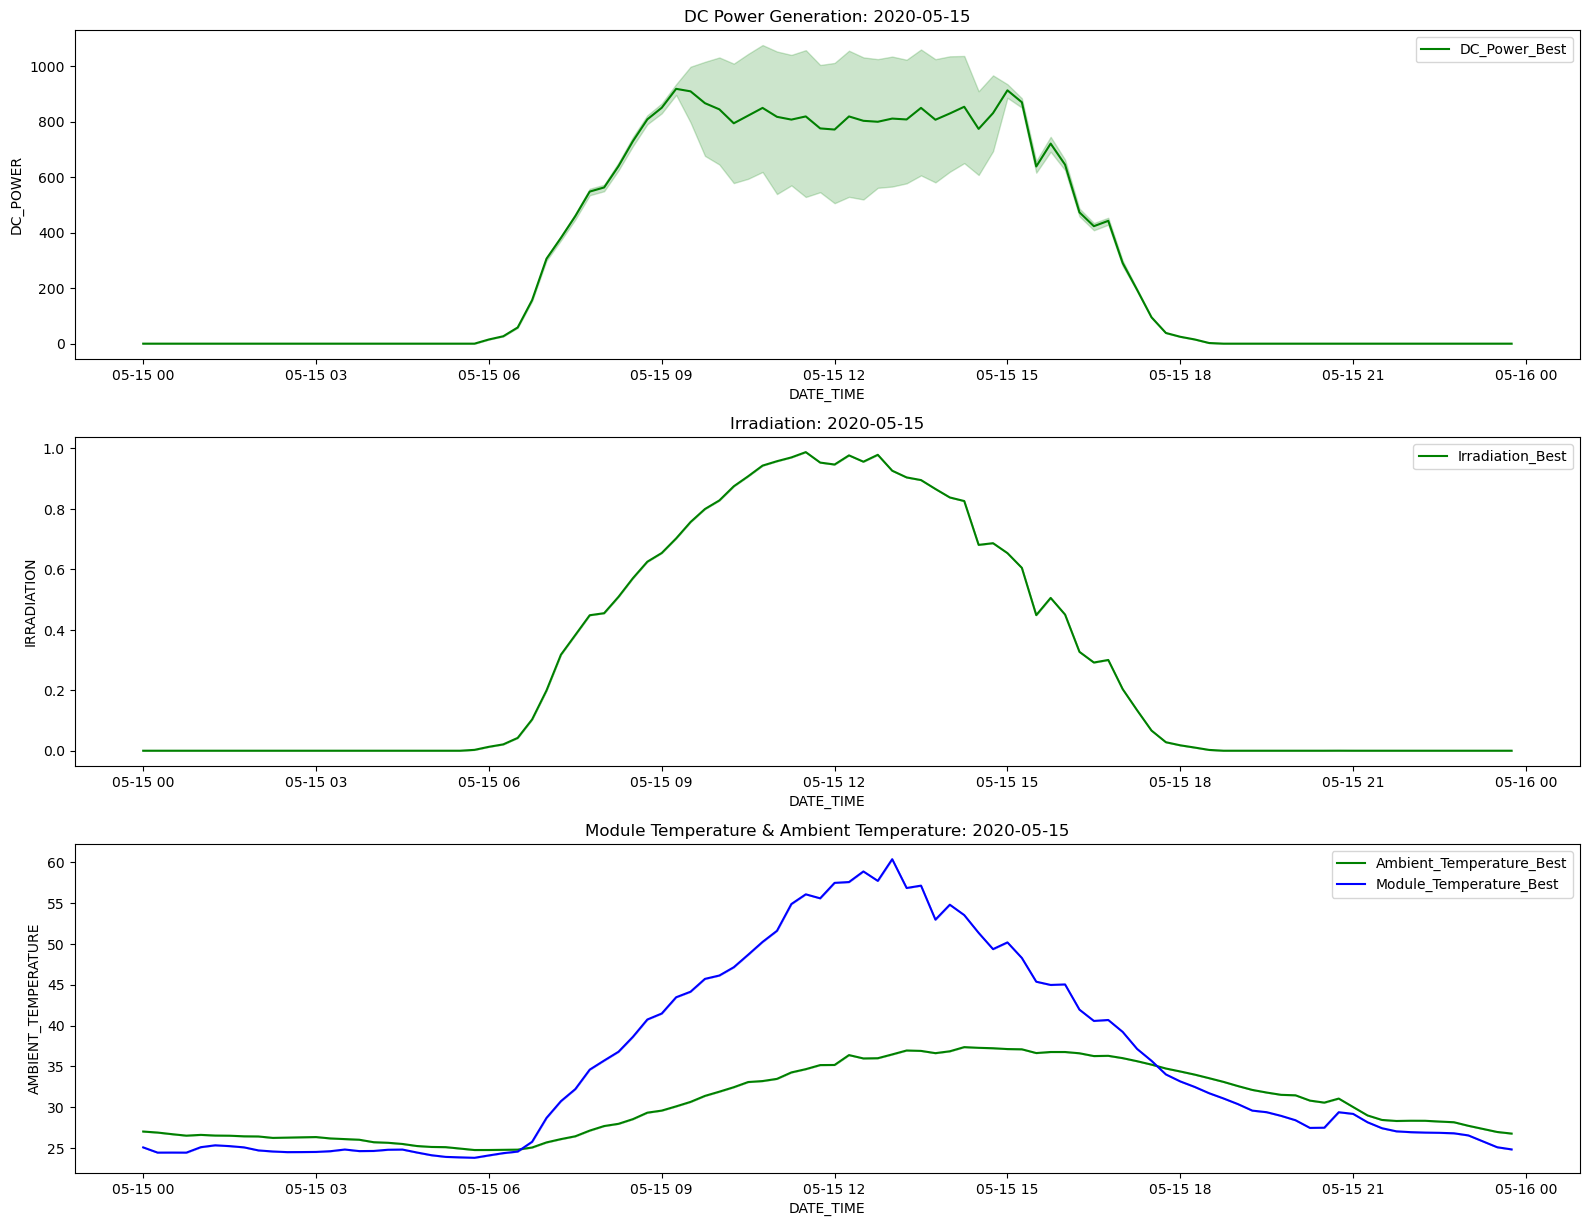

In [51]:
plt.figure(figsize=(16, 16))

date = ["2020-05-15"]

plt.subplot(411)
sns.lineplot(df_solar[df_solar["DATE_STRING"].isin(date)].DATE_TIME, df_solar[df_solar["DATE_STRING"].isin(date)].DC_POWER, label="DC_Power_Best", color='green')
plt.title("DC Power Generation: {}".format(date[0]))

plt.subplot(412)
sns.lineplot(df_solar[df_solar["DATE_STRING"].isin(date)].DATE_TIME, df_solar[df_solar["DATE_STRING"].isin(date)].IRRADIATION, label="Irradiation_Best", color='green')
plt.title("Irradiation: {}".format(date[0]))

plt.subplot(413)
sns.lineplot(df_solar[df_solar["DATE_STRING"].isin(date)].DATE_TIME, df_solar[df_solar["DATE_STRING"].isin(date)].AMBIENT_TEMPERATURE, label="Ambient_Temperature_Best", color='green')
sns.lineplot(df_solar[df_solar["DATE_STRING"].isin(date)].DATE_TIME, df_solar[df_solar["DATE_STRING"].isin(date)].MODULE_TEMPERATURE, label="Module_Temperature_Best", color='blue')
plt.title("Module Temperature & Ambient Temperature: {}".format(date[0]))

plt.tight_layout()
plt.show()

<div style="color:white;
       display:fill;
       border-radius:5px;
       background-color:#AC0000;
       font-size:110%;
       font-family:Nexa;
       letter-spacing:0.5px">
    <p style="padding: 10px;
          color:white;">
        NOTE: There are very large fluctuations in both DC_POWER graph and IRRADIATION graph
    </p>
</div>

**Possible Reasons for these large fluctuation in the DC_POWER, IRRADIATION, Ambient temperature, Module temperature:**
Around noon, there is a significant drop in DC_POWER generation, decreasing from 700 to nearly 20 kWatt. Concurrently, IRRADIATION experiences a nearly 50% decline, decreasing from 0.6 to 0.3. Both Ambient temperature and Module temperature also undergo a sharp decrease, with Module temperature falling from 45°C to 35°C, and Ambient temperature also seeing a reduction.

<code style="background:yellow;color:red">The possible reason for this reduction is due to may be heavy rain and heavily clouded sky and bad weather. There is almost very less possibility of any fault in the system </code>

<h1 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:#e90045">Solar Power Prediction</h1>

In [52]:
df2 = df_solar.copy()
## X is everything
X = df2[['DAILY_YIELD','TOTAL_YIELD','AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION','DC_POWER']]
#Y is there AC_POWER
y = df2['AC_POWER']

In [53]:
X.head()

,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DC_POWER
0,9425.000,2.429e+06,27.005,25.061,0.0,0.0
1,0.000,1.215e+09,27.005,25.061,0.0,0.0
2,3075.333,2.248e+09,27.005,25.061,0.0,0.0
3,269.933,1.704e+06,27.005,25.061,0.0,0.0
4,3177.000,1.994e+07,27.005,25.061,0.0,0.0


In [54]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: AC_POWER, dtype: float64

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=21)

<span style="background-color:yellow;
             color:Black;
             font-size:25px;
             text-align:center;
             border-radius:30px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;">1. LinearRegression
</span>

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
score_lr = 100*lr_clf.score(X_test,y_test)
print(f'LR Model score = {score_lr:4.4f}%')

LR Model score = 99.9994%


In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)
R2_Score_lr = round(r2_score(y_pred_lr,y_test) * 100, 2)

print("R2 Score : ",R2_Score_lr,"%")

R2 Score :  100.0 %


<span style="background-color:yellow;
             color:Black;
             font-size:25px;
             text-align:center;
             border-radius:30px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;">2. RandomForestRegressor
</span>

In [58]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred_rfr = lr.predict(X_test)
R2_Score_rfr = round(r2_score(y_pred_rfr,y_test) * 100, 2)

print("R2 Score : ",R2_Score_rfr,"%")

R2 Score :  100.0 %


<span style="background-color:yellow;
             color:Black;
             font-size:25px;
             text-align:center;
             border-radius:30px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;">3. DecisionTreeRegressor
</span>

In [59]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

y_pred_dtr = lr.predict(X_test)
R2_Score_dtr = round(r2_score(y_pred_dtr,y_test) * 100, 2)

print("R2 Score : ",R2_Score_dtr,"%")

R2 Score :  100.0 %


<span style="background-color:red;
             color:white;
             font-size:17px;
             text-align:center;
             border-radius:30px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;">12. Result Prediction
</span>

In [60]:
prediction = rfr.predict(X_test)
print(prediction)

[   0.            0.          684.68732857 ...    0.         1007.1675381
    0.        ]


In [61]:
cross_checking = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction})
cross_checking.head()

,Actual,Predicted
40426,0.000,0.000
50974,0.000,0.000
53919,684.913,684.687
2384,0.000,0.000
22014,0.000,0.000


In [62]:
cross_checking['Error'] = cross_checking['Actual'] - cross_checking['Predicted']
cross_checking.head()

,Actual,Predicted,Error
40426,0.000,0.000,0.000
50974,0.000,0.000,0.000
53919,684.913,684.687,0.226
2384,0.000,0.000,0.000
22014,0.000,0.000,0.000


In [64]:
cross_checking_final  = cross_checking[cross_checking['Error'] <= 20]
cross_checking_final.sample(25).style.background_gradient(
        cmap='coolwarm').set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

,Actual,Predicted,Error
21071,87.087,87.076,0.011
15573,0.000,0.000,0.000
10367,0.000,0.000,0.000
15433,0.000,0.000,0.000
7581,1071.427,1070.873,0.553
3663,0.520,0.515,0.005
53180,0.000,0.000,0.000
35881,0.000,0.000,0.000
10779,103.867,104.062,-0.195
55205,0.000,0.000,0.000
